# Replicating _Intermediary asset pricing: New evidence from many asset classes_

### Xinye Li, Hang Yu

In [ ]:
import load_nyfed
load_nyfed.pull_nyfed_primary_dealers_list(load_nyfed.url)

import pandas as pd
import wrds
import config
from datetime import datetime
import unittest
import matplotlib.pyplot as plt
import numpy as np
import Table02Analysis
import Table02Prep

import Table03Load
import Table03Analysis
import Table03

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

File saved to cache at data\pulled\nyfed_primary_dealers_list.xls.


### 1. Table 01

#### 1-1 Pull the NY Fed primary dealers list from the NY Fed website

* Utilize the pull_nyfed_primary_dealers_list function, as defined in the 'load_nyfed.py' file, to download the 'nyfed_primary_dealers_list.xls' Excel file. This function saves the downloaded file into the 'data/pulled' directory.
* This process is managed by the task_pull_nyfed() function in the 'dodo.py' file. It handles downloading the 'nyfed_primary_dealers_list.xls' Excel file and saving it in the 'data/pulled' directory.

#### 1-2 Load the NY Fed primary dealers list from the cached files in the 'data/pulled' directory

* Use the 'load_nyfed_primary_dealers_list' function to access the NY Fed primary dealers list from the cached data in the 'data/pulled' directory. Focus on the '2000s' and 'Dealer Alpha' worksheets to extract the list of primary dealers as of February 2014, aiming to replicate Table 1.

#### 1-3 Replicate Table 1 using data from the 'nyfed_primary_dealers_list.xls' Excel file

* The '2000s' worksheet provides annual listings of primary dealers from 2000 to 2014; refine this data to isolate dealers active as of February 2014.

* The 'Dealer Alpha' worksheet covers all primary dealers from 1960 to 2014, including their start and end dates. Clean this data to facilitate matching with the primary dealer listings found in the '2000s' worksheet."

* Match the 2014 primary dealer list with their start dates, taking care to handle name discrepancies across two Excel sheets, such as extra spaces or differences in punctuation.
* Also, for dealers who were active, paused, and then resumed, use their latest start date. The code should adjust for these variations to correctly align with the table in the paper. Lastly, arrange the start dates from earliest to most recent.

* The author manually matched dealers with their publicly-traded holding companies. For the replication, a 'ticks.csv' file was created and placed in the 'data/manual' directory, containing the mapping information between primary dealers and their holding companies. Subsequently, an additional column was introduced to the 'merged_df' table to display the corresponding holding company for each dealer, utilizing the information from the 'ticks.csv' file.

#### 1-4 Convert the table to LaTeX format using the to_latex() function

* The to_latex function, located in the 'Table_01_to_latex.py' file, is utilized to convert the 'merged_df_final' table into LaTeX format. The resulting LaTeX code is then saved into the 'Table_01_to_latex.tex' file within the output directory.
* Before converting the table to LaTeX format, replace '&' with '\\&' in company names. Since LaTeX uses '&' to recognize table columns, an unescaped '&' in company names can cause errors when generating the table in LaTeX format.

#### 1-5 Complete the LaTeX setup to replicate Table 1, incorporating the formatted table

* Use the 'Table_01_to_latex.tex' file from the 'output' directory, which contains the table in LaTeX format, to create a 'Report_Table_01.tex' file in the 'reports' directory. This action replicates the entire table. The table is inserted into 'Report_Table_01.tex' by employing the '\input{\PathToOutput/Table_01_to_latex.tex}' command.

### 2. Table A.1

#### 2-1 Load the NY Fed primary dealers list from the cached files in the 'data/pulled' directory

* Use the 'load_nyfed_primary_dealers_list' function to access the NY Fed primary dealers list from the cached data in the 'data/pulled' directory. This time, focus on the 'Dealer Alpha' worksheets to extract the list of primary dealers from 1960 to 2014, including their start and end dates, with the aim of replicating Table A.1.

#### 2-2 Replicate Table A.1 using data from the 'nyfed_primary_dealers_list.xls' Excel file

* Clean the data from the 'Dealer Alpha' worksheet to replicate Table A.1, including formatting dates and marking companies still active as primary dealers with 'Current' in the end date column, etc.

#### 2-3 Convert the table to LaTeX format using the to_latex() function

* The to_latex function, found in the 'Table_A1_to_latex.py' file, is used to convert the 'df_dealer_alpha' table into LaTeX format. The resulting LaTeX code is then saved in the 'Table_A1_to_latex.tex' file within the output directory.

* As described in the Table 01 replication process, before converting the table to LaTeX format, replace '&' with '\\&' in company names. This is necessary because LaTeX uses '&' to recognize table columns, and an unescaped '&' in company names can cause errors when generating the table in LaTeX format.
* To match the format presented in Table A.1, separate the primary dealer list at the midpoint, adding a separator column for visual division

#### 2-4 Complete the LaTeX setup to replicate Table A.1, incorporating the formatted table

* To replicate the entire table in a report, use the 'Table_A1_to_latex.tex' file from the 'output' directory. Create a 'Report_Table_A1.tex' file in the 'reports' directory and insert the table by using the command '\input{\PathToOutput/Table_A1_to_latex.tex}'.

#### 2-5 Limitations on Replicating Table A.1

* While the replication closely mirrors Table A.1 in format, the list of primary dealers, and data accuracy including start and end dates, a perfect match with the original Table A.1 in the paper is not achieved for several reasons: 

* The author used abbreviated company names, shortened manually, whereas the Excel file from the NY Fed features the complete names. 
* The author consolidated the list by combining entries that, despite name changes, continued as primary dealers. In contrast, the Excel file from the NY Fed presents a more extensive list by including all dealers, accounting for their names before and after changes, resulting in a higher number of entries.
* Due to the differences in abbreviation usage and the consolidation approach by the author, conducting precise unit testing was challenging, as the subjectivity in primary dealer name abbreviation and entry combination affected the direct comparison.

### Table 02

The following code reads in a manual data file that contains necessary information on primary dealers from 1960-2012 and then merges it with the CRSP Compustat Merge Linkhist table to get additional information on each, such as the SIC codes. The linkhist table is also used as the main reference table to pull the other comparison groups for the table.

In [2]:
db = wrds.Connection(wrds_username=config.WRDS_USERNAME)
merged_main, link_hist = Table02Prep.prim_deal_merge_manual_data_w_linktable()
merged_main

Loading library list...
Done


,gvkey,conm,sic,Start Date,End Date
0,15504,ABN-AMRO HOLDINGS NV,6020,9/29/1998,9/15/2006
11,3243,CITIGROUP INC,6199,5/19/1960,4/17/2000
38,3243,CITIGROUP INC,6199,6/15/1961,Current
65,7647,BANK OF AMERICA CORP,6020,4/18/1994,9/30/1997
106,7647,BANK OF AMERICA CORP,6020,11/17/1971,4/15/1994
...,...,...,...,...,...
1791,1414,PRIMERICA INC,6311,8/22/1979,8/31/1998
1822,9577,SECURITY PACIFIC CORP,6020,12/11/1986,1/17/1991
1842,2612,CALIFORNIA FED BANCORP INC,6035,6/7/1983,8/5/1983
1855,15706,TORONTO DOMINION BANK,6020,2/11/2014,Current


In [3]:
link_hist

,gvkey,LPERMCO,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,costat,sic
0,1000,23369,1970-12-31,1970.0,INDL,C,D,STD,AE.2,A & E PLASTIK PAK INC,USD,I,3089
1,1000,23369,1971-12-31,1971.0,INDL,C,D,STD,AE.2,A & E PLASTIK PAK INC,USD,I,3089
2,1000,23369,1972-12-31,1972.0,INDL,C,D,STD,AE.2,A & E PLASTIK PAK INC,USD,I,3089
3,1000,23369,1973-12-31,1973.0,INDL,C,D,STD,AE.2,A & E PLASTIK PAK INC,USD,I,3089
4,1000,23369,1974-12-31,1974.0,INDL,C,D,STD,AE.2,A & E PLASTIK PAK INC,USD,I,3089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320693,296318,53885,2012-12-31,2012.0,INDL,C,D,STD,ORIG,OCEAN RIG UDW INC,USD,I,1381
320711,296753,53991,2012-12-31,2012.0,INDL,C,D,STD,AVGTF,AVG TECHNOLOGIES NV,USD,I,7372
320724,296885,54281,2012-12-31,2012.0,INDL,C,D,STD,RDHL,REDHILL BIOPHARMA LTD,USD,A,2836
320747,297209,53928,2011-12-31,2011.0,INDL,C,D,STD,PACDQ,PACIFIC DRILLING SA,USD,A,1381


As mentioned above, the next step is now to use the linkhist table to determine what the other comparison groups are. We use SIC codes to determine broker dealers and banks, and we make sure to exclude any firms that are already in the primary dealer group so we do not have duplicates. Below is the reference table for broker dealers, which had explicit SIC codes mentioned in the paper - banks did not have explicit SIC codes mentioned and required research.

In [4]:
comparison_group_link_dict = Table02Prep.create_comparison_group_linktables(link_hist, merged_main)
comparison_group_link_dict['PD']

,gvkey,conm,sic,Start Date,End Date
0,15504,ABN-AMRO HOLDINGS NV,6020,9/29/1998,9/15/2006
11,3243,CITIGROUP INC,6199,5/19/1960,4/17/2000
38,3243,CITIGROUP INC,6199,6/15/1961,Current
65,7647,BANK OF AMERICA CORP,6020,4/18/1994,9/30/1997
106,7647,BANK OF AMERICA CORP,6020,11/17/1971,4/15/1994
...,...,...,...,...,...
1791,1414,PRIMERICA INC,6311,8/22/1979,8/31/1998
1822,9577,SECURITY PACIFIC CORP,6020,12/11/1986,1/17/1991
1842,2612,CALIFORNIA FED BANCORP INC,6035,6/7/1983,8/5/1983
1855,15706,TORONTO DOMINION BANK,6020,2/11/2014,Current


In [5]:
comparison_group_link_dict.keys()

dict_keys(['BD', 'Banks', 'Cmpust.', 'PD'])

We then used each of the reference tables (primary dealers, broker dealers, banks, all firms in Compustat) and pulled data from the Compustat Fundamentals Quarterly table. The paper mentioned use of monthly data, but there was no apparent monthly table for financial statement data from Compustat. This led to some confusion about how these authors generated their ratios - I am wondering if they computed monthly ratios given what months came out of annual and then took the average.

Below is the dataset for broker dealers. We calculate or directly pull the values we need in our query so we don't need to do it after. It was mentioned in class this was a best practice because it would run on WRDS servers.

In [6]:
comparison_group_link_dict['PD'].describe()

,gvkey,sic
count,79.000000,79.000000
mean,27174.405063,6153.050633
std,50797.262254,449.809301
min,1414.000000,6020.000000
25%,6842.500000,6020.000000
50%,12223.000000,6020.000000
75%,15613.000000,6211.000000
max,248136.000000,9997.000000


In [7]:
datasets = Table02Prep.pull_data_for_all_comparison_groups(db, comparison_group_link_dict)
datasets['BD']

,datadate,total_assets,book_debt,book_equity,market_equity,gvkey,conm
0,1981-12-31,NaN,NaN,NaN,NaN,002432,BROWN (ROBERT C.) & CO INC
1,1982-03-31,NaN,NaN,NaN,NaN,002432,BROWN (ROBERT C.) & CO INC
2,1982-06-30,1.793,NaN,NaN,NaN,002432,BROWN (ROBERT C.) & CO INC
3,1982-09-30,2.712,0.871,1.841,NaN,002432,BROWN (ROBERT C.) & CO INC
4,1982-12-31,NaN,NaN,NaN,NaN,002432,BROWN (ROBERT C.) & CO INC
...,...,...,...,...,...,...,...
5886,2001-03-31,NaN,NaN,NaN,NaN,209386,VAN DER MOOLEN NV
5887,2001-06-30,NaN,NaN,NaN,NaN,209386,VAN DER MOOLEN NV
5888,2001-09-30,1685.772,1436.733,NaN,NaN,209386,VAN DER MOOLEN NV
5889,2001-12-31,3631.252,3064.614,538.511,1098.8086,209386,VAN DER MOOLEN NV


We then prep that data further by aggregating by year and standardizing the date to the first of the year. We also convert the datadate to a datetime column that can be sliced.

In [8]:
prepped_datasets = Table02Prep.prep_datasets(datasets)
prepped_datasets['Banks']

,datadate,total_assets,book_debt,book_equity,market_equity
0,1961-12-31,1.576358e+04,9.510427e+03,38.218,0.000000e+00
1,1962-01-31,1.576358e+04,9.510427e+03,38.218,0.000000e+00
2,1962-02-28,1.576358e+04,9.510427e+03,38.218,0.000000e+00
3,1962-03-31,5.271443e+04,1.737117e+04,4768.189,9.480914e+03
4,1962-04-30,5.271443e+04,1.737117e+04,4768.189,9.480914e+03
...,...,...,...,...,...
608,2012-08-31,1.422168e+07,1.312939e+07,1059816.065,9.601542e+05
609,2012-09-30,1.455478e+07,1.342757e+07,1093982.278,1.017572e+06
610,2012-10-31,1.454541e+07,1.341925e+07,1092938.016,1.015913e+06
611,2012-11-30,1.454541e+07,1.341925e+07,1092938.016,1.015913e+06


In [9]:
prepped_datasets['BD']

,datadate,total_assets,book_debt,book_equity,market_equity
0,1966-03-31,0.000,0.000,0.000,0.000000
1,1966-04-30,0.000,0.000,0.000,0.000000
2,1966-05-31,0.000,0.000,0.000,0.000000
3,1966-06-30,0.000,0.000,0.000,0.000000
4,1966-07-31,0.000,0.000,0.000,0.000000
...,...,...,...,...,...
557,2012-08-31,330459.671,290104.883,40006.872,41367.816214
558,2012-09-30,335106.111,294150.975,40614.380,40550.497466
559,2012-10-31,334610.887,294041.208,40228.923,40050.016736
560,2012-11-30,336497.070,295842.955,40305.133,40515.089956


We then weave in some of our analysis into the process, whenever the necessary dataset for the analysis is first available. Below is our main table of ratios, where we have computed the
$$
\frac{\text{Primary dealers amount}}{\text{Comparison group amount (less PD) + Primary dealers amount}}
$$

In [10]:
Table02Analysis.create_summary_stat_table_for_data(datasets)
table = Table02Prep.create_ratios_for_table(prepped_datasets)
table

,total_assets_BD,book_debt_BD,book_equity_BD,market_equity_BD,total_assets_Banks,book_debt_Banks,book_equity_Banks,market_equity_Banks,total_assets_Cmpust.,book_debt_Cmpust.,book_equity_Cmpust.,market_equity_Cmpust.,Period
datadate,,,,,,,,,,,,,
1962-03-31,NaN,NaN,NaN,NaN,0.14,0.20,0.14,0.17,0.14,0.20,0.14,0.17,1960-2012
1962-04-30,NaN,NaN,NaN,NaN,0.14,0.20,0.14,0.17,0.14,0.20,0.14,0.17,1960-2012
1962-05-31,NaN,NaN,NaN,NaN,0.14,0.20,0.14,0.17,0.14,0.20,0.14,0.17,1960-2012
1962-06-30,NaN,NaN,NaN,NaN,0.15,0.20,0.16,0.16,0.15,0.20,0.16,0.15,1960-2012
1962-07-31,NaN,NaN,NaN,NaN,0.15,0.20,0.16,0.16,0.15,0.20,0.16,0.15,1960-2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-08-31,0.99,0.99,0.97,0.96,0.62,0.62,0.57,0.48,0.28,0.32,0.09,0.04,1990-2012
2012-09-30,0.99,0.99,0.97,0.96,0.62,0.62,0.56,0.49,0.28,0.32,0.09,0.04,1990-2012
2012-10-31,0.99,0.99,0.97,0.96,0.62,0.62,0.57,0.50,0.28,0.32,0.09,0.04,1990-2012


We create a figure that can give the reader insight into how the ratios have shifted over time for each category and comparison group. We had to clean some of the data and fill null values to have the graph look reasonable but without changing the overall shape of it too dramatically.
Lastly, we get our final table which was what we were trying to replicate from the paper. This table is then converted to LaTeX and outputted to a .tex file.

In [11]:
formatted_table = Table02Prep.format_final_table(table)
formatted_table

Metric    Total assets               Book debt               Book equity  \
Source              BD Banks Cmpust.        BD Banks Cmpust.          BD   
Period                                                                     
1960-2012         0.91  0.34    0.14      0.91  0.34    0.17        0.90   
1960-1990         0.91  0.19    0.09      0.91  0.19    0.11        0.89   
1990-2012         0.90  0.51    0.21      0.90  0.52    0.24        0.92   

Metric                  Market equity                
Source    Banks Cmpust.            BD Banks Cmpust.  
Period                                               
1960-2012  0.32    0.05          0.90  0.33    0.04  
1960-1990  0.23    0.05          0.86  0.24    0.04  
1990-2012  0.45    0.06          0.94  0.44    0.04

### Table 03 Brief Overview

#### 1. Load the NY Fed primary dealers list from the cached files in the `data/pulled` directory.
#### 2. Fetch `market_equity`, `book_equity`, `book_debt`, and `total_assets` within specified period from WRDS Compustat, using the holding companies’ `gvkey`.
#### 3. Aggregate these metrics by quarter, then calculate the `market_capital_ratio` and `book_capital_ratio`.
#### 4. Fetch financial assets and liabilities to compute the AEM Leverage ratio.
#### 5. Compute correlations to generate **Panel A**.
#### 6. Convert the ratio datasets (from step 4) into the corresponding factor dataset. Repeat step 5 to generate **Panel B**.
#### 7. Generate the corresponding plots and a LaTeX Summary Table for Panel A and Panel B.
#### 8. Repeat steps 1–7, but this time using updated data until the current date.
---


### Table 3 Replication with details:

The following code reads in a manual data file that contains necessary information on primary dealers from 1960-2012 with the Compustat gvkey to get additional information.

In [13]:
prim_dealers = Table03.get_gvkey()
prim_dealers

,Primary Dealer,gvkey,Unnamed: 0,Start Date,End Date
0,"AUBREY G. LANSTON & CO., INC.",011687,0,1960-05-19,2000-04-17
1,CHEMICAL,002968,4,1960-05-19,1989-03-31
2,CHEMICAL,002968,4,1960-05-19,1989-03-31
3,DREXEL BURNHAM LAMBERT,144496,8,1960-05-19,1990-03-28
4,FIRST CHICAGO,144496,9,1960-05-19,1990-01-01
...,...,...,...,...,...
133,MF GLOBAL INC.,002014,160,2011-02-02,2011-10-31
134,"SG AMERICAS SECURITIES, LLC",002968,161,2011-02-02,2025-03-09
135,MORGAN STANLEY & CO. LLC,001494,162,2011-05-31,2025-03-09
136,"BANK OF NOVA SCOTIA, NEW YORK AGENCY",007647,163,2011-10-04,2025-03-09


### Building the Query String

In this step, we take the two quarter strings—`start_qtr` and `end_qtr`—that were generated from the user’s `start_date` and `end_date`, and use them in an SQL query. Specifically:

1. **Fetch rows where `datafqtr` falls between the start quarter (`start_qtr`) and end quarter (`end_qtr`).**

2. **Select the columns:**  
   - `atq AS total_assets` (total assets)  
   - `ltq AS book_debt` (book debt)  
   - `COALESCE(...) AS book_equity` (book equity, ensuring it is never null)  
   - `cshoq * prccq AS market_equity` (market equity: shares outstanding times price)  
   - `gvkey` and `conm` (company identifier and name)  
   - `datafqtr` (the quarter indicator itself)

3. **Filter:**  
   - **`gvkey = 'XXXXXX'`**: Targets the specific company in Compustat (zero-padded to 6 digits).  
   - **`datafqtr BETWEEN 'start_qtr' AND 'end_qtr'`**: Ensures we only get the quarters in the specified date range.  
   - Additional filters (`indfmt='INDL'`, `datafmt='STD'`, `popsrc='D'`, `consol='C'`) ensure we retrieve standard, consolidated, domestic industrial statements from Compustat.

In [14]:
db = wrds.Connection(wrds_username=config.WRDS_USERNAME)
dataset, _ = Table03Load.fetch_data_for_tickers(prim_dealers, db)
dataset

Loading library list...
Done


,datafqtr,total_assets,book_debt,book_equity,market_equity,gvkey,conm
0,2011Q4,2129046.000,1898945.000,230101.000,58579.815280,007647,BANK OF AMERICA CORP
1,2012Q1,2181449.000,1948950.000,232499.000,103122.530280,007647,BANK OF AMERICA CORP
2,2012Q2,2160854.000,1924879.000,235975.000,88154.788420,007647,BANK OF AMERICA CORP
3,2012Q3,2166162.000,1927556.000,238606.000,95163.267610,007647,BANK OF AMERICA CORP
4,2012Q4,2209974.000,1973018.000,236956.000,125135.645040,007647,BANK OF AMERICA CORP
...,...,...,...,...,...,...,...
85,1999Q2,17966.504,16476.977,1452.365,5017.198500,011687,ZIONS BANCORPORATION NA
86,1999Q3,18950.991,17444.070,1468.827,4354.434000,011687,ZIONS BANCORPORATION NA
87,1999Q4,20280.900,18581.813,1659.838,5066.035687,011687,ZIONS BANCORPORATION NA
88,2000Q1,20996.557,19370.811,1585.667,3567.012750,011687,ZIONS BANCORPORATION NA


### Aggregate by quarter and take the sum of companies for all metrics
Groups the dataset by quarter and sums the numeric columns for each date. This produces a condensed DataFrame with one row per date.

### Fetch financial assets and liabilities

Download ZIP file containing the Federal Reserve’s Z.1 (Flow of Funds) data from a March 7, 2013 release. That file contains broker-dealer asset and liability information identified by Flow of Funds codes (e.g., `FL664090005.Q` for financial assets and `FL664190005.Q` for liabilities).

In [15]:
prep_datast = Table03.prep_dataset(dataset, UPDATED=False)
prep_datast

Extracted ltab127d.prn to data\pulled\ltab127d.prn


,datafqtr,total_assets,book_debt,book_equity,market_equity,bd_fin_assets,bd_liabilities
27,1968-12-31,1.537165e+04,1.418394e+04,1007.469,1736.802931,18513.0,17690.00
28,1969-03-31,1.547582e+04,1.426585e+04,1027.446,1638.088558,14615.0,13739.00
29,1969-06-30,1.636138e+04,1.513696e+04,1036.674,1446.257662,15847.0,14953.00
30,1969-09-30,1.573590e+04,1.448989e+04,1051.467,1457.416911,12890.0,12030.00
31,1969-12-31,1.644747e+04,1.518132e+04,1057.198,1464.358471,15402.0,14553.00
...,...,...,...,...,...,...,...
199,2011-12-31,1.348277e+07,1.258211e+07,897769.141,471022.248250,1949702.0,1870911.00
200,2012-03-31,1.137919e+07,1.056284e+07,814811.823,637405.969305,2063829.0,1978049.00
201,2012-06-30,1.390160e+07,1.297705e+07,923127.881,518202.053530,2052880.0,1967675.00
202,2012-09-30,1.397236e+07,1.302512e+07,945687.150,577645.407810,2048823.0,1957817.00


### Calculate ratios

- **Market Capitalization Ratio**  
  \[
  market_cap_ratio = market_equity / (book_debt + market_equity)
  \]

- **Book Capitalization Ratio**  
  \[
  book_cap_ratio = book_equity / (book_debt + book_equity)
  \]

- **AEM Leverage Ratio**  
  \[
  aem_leverage_ratio = bd_fin_assets / (bd_fin_assets - bd_liabilities)
  \]


In [16]:
ratio_dataset = Table03.aggregate_ratios(prep_datast)
ratio_dataset

,market_cap_ratio,book_cap_ratio,aem_leverage_ratio
date,,,
1968-12-31,0.109091,0.066318,22.494532
1969-03-31,0.102999,0.067183,16.683790
1969-06-30,0.087212,0.064097,17.725951
1969-09-30,0.091390,0.067656,14.988372
1969-12-31,0.087972,0.065104,18.141343
...,...,...,...
2011-12-31,0.036085,0.066601,24.745237
2012-03-31,0.056910,0.071615,24.059559
2012-06-30,0.038399,0.066411,24.093422


### Fetch Macroeconomic Data

1. **Load and Process FRED Macroeconomic Data**  
   - Retrieve raw macroeconomic indicators from FRED (such as unemployment rate, NFCI, real GDP, etc.), and the data is resampled to a quarterly frequency.

2. **Load and Process Shiller PE Data, then Calculate the Earnings-to-Price Ratio by taking recipocal, then resample to a quarterly frequency**  

3. **Fetch Fama-French Factors (specifically the market return factor) and Convert to Quarterly Frequency**  

4. **Pull CRSP Value-Weighted Index Data and Calculate Market Volatility**  
   - A SQL query is used to extract daily returns (`'vwretd'`) from the CRSP database (`crsp.dsi`).  
   - The daily returns are then grouped by quarter (`pd.Grouper(freq='Q')`), and the standard deviation of daily returns within each quarter is computed (`.std()`) to measure market volatility (`'mkt_vol'`).

5. **Merge All Data into a Single Quarterly Dataset** 

In [17]:
macro_dataset = Table03.macro_variables(db)
macro_dataset

Loaded data from cache.
Loading data from cache.


,cape,e/p,unemp_rate,nfci,real_gdp,real_gdp_growth,mkt_ret,mkt_vol
1969-03-31,20.185412,0.049685,3.400000,NaN,5283.597,6.4,0.0264,0.005781
1969-06-30,20.371403,0.049120,3.433333,NaN,5299.625,1.2,-0.0718,0.005469
1969-09-30,18.503090,0.054048,3.566667,NaN,5334.600,2.7,-0.0298,0.008571
1969-12-31,17.882345,0.055975,3.566667,NaN,5308.556,-1.9,-0.0263,0.006589
1970-03-31,16.264751,0.061616,4.166667,NaN,5300.652,-0.6,-0.0106,0.007303
...,...,...,...,...,...,...,...,...
2023-03-31,28.490441,0.035106,3.533333,-0.239206,22403.435,2.8,0.0251,0.010522
2023-06-30,29.155641,0.034311,3.533333,-0.225327,22539.418,2.4,0.0647,0.007412
2023-09-30,30.332030,0.032976,3.666667,-0.332025,22780.933,4.4,-0.0524,0.006837
2023-12-31,30.732768,0.032556,3.800000,-0.375653,22960.600,3.2,0.0487,0.008071


### Create final panelA:
**Merge the ratios and econometric data, then calculate the correlations of all columns in this merged dataset**

In [18]:
panelA = Table03.create_panelA(ratio_dataset, macro_dataset)
panelA

,Market capital,Book capital,AEM leverage,E/P,Unemployment,Financial conditions,GDP,Market excess return,Market volatility
1970-03-31,0.084395,0.063366,16.629771,0.061616,4.166667,NaN,5300.652,-0.0106,0.007303
1970-06-30,0.072487,0.063735,15.759732,0.068992,4.766667,NaN,5308.164,-0.0579,0.014278
1970-09-30,0.075406,0.060752,18.418283,0.070382,5.166667,NaN,5357.077,0.0418,0.008623
1970-12-31,0.077461,0.059813,22.043419,0.064941,5.833333,NaN,5299.672,0.0572,0.006220
1971-03-31,0.078125,0.057286,19.451571,0.059445,5.933333,0.888428,5443.619,0.0413,0.004786
...,...,...,...,...,...,...,...,...,...
2011-12-31,0.036085,0.066601,24.745237,0.048938,8.633333,-0.015701,17222.583,0.0074,0.017560
2012-03-31,0.056910,0.071615,24.059559,0.046177,8.266667,-0.325075,17367.010,0.0311,0.006572
2012-06-30,0.038399,0.066411,24.093422,0.047445,8.200000,-0.280007,17444.525,0.0389,0.010614
2012-09-30,0.042465,0.067690,22.513054,0.046744,8.033333,-0.387446,17469.650,0.0273,0.007308


In [19]:
correlation_panelA = Table03.calculate_correlation_panelA(panelA)
correlation_panelA

,Market capital,Book capital,AEM leverage
Market capital,1.000000,0.501865,0.524710
Book capital,NaN,1.000000,0.196753
AEM leverage,NaN,NaN,1.000000
E/P,-0.779344,-0.534457,-0.630432
Unemployment,-0.556340,-0.045354,-0.340982
GDP,0.479522,0.350197,0.706515
Financial conditions,-0.499105,-0.484748,-0.262337
Market volatility,0.000752,-0.127053,0.325796


### Convert the original market capital ratio, book capital ratio, and aem_leverage ratio to corresponding factors

#### 1. market_capital_factor

1. **Fit an AR(1) Model on `market_cap_ratio`**  
   - The function drops any missing values from the `market_cap_ratio` series.  
   - An AR(1) model with a constant term is fitted. 
   - These residuals are called “innovations.”

2. **Create the Factor**  
   - The factor is defined as the “innovation” (residual) divided by the *lagged* `market_cap_ratio`. 

---

#### 2. book_capital_factor

1. **Fit an AR(1) Model on `book_cap_ratio`**  
   - Again, missing values are dropped.  
   - An AR(1) model with a constant term is fitted, just like above.

2. **Create the Factor**  
   - Use the residuals from the model and divide by the lagged `book_cap_ratio`.

---

#### 3. aem_leverage_factor

1. **Compute Log Differences**  
   - Take the natural log of `aem_leverage_ratio`, then calculate the first difference of that log.

2. **Quarterly Dummy Variables**  
   - Extract the quarter number (1, 2, 3, 4) from the index.  
   - Create dummy variables `Q2`, `Q3`, and `Q4` (with `Q1` implicitly captured by the constant term if needed).

3. **Real-Time Regression**  
   - For each point in time, regress the change in log leverage on a constant plus the quarterly dummies, using all available data up to that point.  
   - The residual from this regression is the part of the leverage change not explained by typical seasonal patterns or a constant trend. This residual is aem_leverage_factor.

In [20]:
factors_dataset = Table03.convert_ratios_to_factors(ratio_dataset)
factors_dataset

,market_capital_factor,book_capital_factor,aem_leverage_factor
date,,,
1971-06-30,-0.117934,-0.008865,-0.075231
1971-09-30,-0.025054,0.029941,-0.037166
1971-12-31,-0.028014,-0.057626,-0.012895
1972-03-31,0.081007,0.064114,-0.004572
1972-06-30,-0.185082,-0.081595,-0.007383
...,...,...,...
2011-12-31,-0.143681,-0.001839,0.061380
2012-03-31,0.539798,0.104673,0.030244
2012-06-30,-0.317646,-0.037853,-0.003130


### Create final panelB:
**Merge the factors and econometric data, then calculate the correlations of all columns in this merged dataset**

In [21]:
panelB = Table03.create_panelB(factors_dataset, macro_dataset)
panelB

,Market capital factor,Book capital factor,AEM leverage factor,E/P growth,Unemployment growth,Financial conditions growth,GDP growth,Market excess return,Market volatility growth
1971-06-30,-0.117934,-0.008865,-0.075231,-0.040474,-0.005634,0.451472,0.005394,-0.0010,0.104441
1971-09-30,-0.025054,0.029941,-0.037166,0.044563,0.022347,0.206419,0.008191,-0.0085,0.361268
1971-12-31,-0.028014,-0.057626,-0.012895,0.039374,-0.016713,-0.050381,0.002346,0.0871,0.007801
1972-03-31,0.081007,0.064114,-0.004572,-0.083785,-0.028492,-0.723717,0.018205,0.0063,-0.514461
1972-06-30,-0.185082,-0.081595,-0.007383,-0.012728,-0.011628,-1.320558,0.022439,-0.0243,0.072992
...,...,...,...,...,...,...,...,...,...
2011-12-31,-0.143681,-0.001839,0.061380,0.013342,-0.041594,-2.568251,0.011168,0.0074,-0.191574
2012-03-31,0.539798,0.104673,0.030244,-0.058080,-0.043399,3.030345,0.008351,0.0311,-0.982825
2012-06-30,-0.317646,-0.037853,-0.003130,0.027098,-0.008097,-0.149240,0.004453,0.0389,0.479335
2012-09-30,0.075987,0.048418,-0.086825,-0.014881,-0.020535,0.324763,0.001439,0.0273,-0.373170


In [22]:
correlation_panelB = Table03.calculate_correlation_panelB(panelB)
correlation_panelB

,Market capital factor,Book capital factor,AEM leverage factor
Market capital factor,1.000000,0.522832,0.137654
Book capital factor,NaN,1.000000,0.027770
AEM leverage factor,NaN,NaN,1.000000
Market excess return,0.245755,-0.021798,-0.060723
E/P growth,-0.351598,0.015758,-0.224262
Unemployment growth,-0.099553,-0.058347,-0.068046
GDP growth,0.057947,-0.015666,0.060421
Financial conditions growth,-0.044083,-0.078010,-0.065575
Market volatility growth,-0.335322,-0.161627,-0.076544


### Construct the whole Table 03 by concatenating two panels

In [23]:
formatted_table = Table03.format_final_table(correlation_panelA, correlation_panelB)
formatted_table

,Market capital,Book capital,AEM leverage
Panel A: Correlations of levels,NaN,NaN,NaN
Market capital,1.0,0.501865,0.52471
Book capital,NaN,1.0,0.196753
AEM leverage,NaN,NaN,1.0
E/P,-0.779344,-0.534457,-0.630432
Unemployment,-0.55634,-0.045354,-0.340982
GDP,0.479522,0.350197,0.706515
Financial conditions,-0.499105,-0.484748,-0.262337
Market volatility,0.000752,-0.127053,0.325796
Panel B: Correlations of factors,NaN,NaN,NaN


### We also generate seperate latex summary statistics tables for panelA and panelB, and saved to output directory as table03_panelA_sstable.tex and table03_panelB_sstable.tex. The table includes the count, mean, std, min, max of each columns.

In [24]:
Table03Analysis.create_summary_stat_table_for_panelA(panelA)
Table03Analysis.create_summary_stat_table_for_panelB(panelB)

In [25]:
summary_df = pd.DataFrame()
info = panelA.describe()
info = info.drop(['25%', '50%', '75%'])
summary_df = pd.concat([summary_df, info], axis=0)
summary_df

,Market capital,Book capital,AEM leverage,E/P,Unemployment,Financial conditions,GDP,Market excess return,Market volatility
count,172.000000,172.000000,172.000000,172.000000,172.000000,168.000000,172.000000,172.000000,172.000000
mean,0.054552,0.047717,17.962165,0.063991,6.385078,0.144249,10862.425930,0.004142,0.009167
std,0.031161,0.009832,11.910718,0.029410,1.568929,1.067737,3905.850714,0.040567,0.004911
min,0.015626,0.032500,4.711869,0.022885,3.900000,-1.099578,5299.672000,-0.129000,0.003979
max,0.138605,0.071942,99.473955,0.145438,10.666667,4.699912,17489.852000,0.108400,0.042188


In [26]:
summary_df = pd.DataFrame()
info = panelB.describe()
info = info.drop(['25%', '50%', '75%'])
summary_df = pd.concat([summary_df, info], axis=0)
summary_df

,Market capital factor,Book capital factor,AEM leverage factor,E/P growth,Unemployment growth,Financial conditions growth,GDP growth,Market excess return,Market volatility growth
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,-0.011146,-0.001260,0.010032,-0.001347,0.001638,0.022700,0.006989,0.003837,0.002745
std,0.212142,0.093611,0.153774,0.071678,0.050544,0.854824,0.008197,0.040458,0.335254
min,-0.412211,-0.238819,-1.009222,-0.201081,-0.093177,-3.811716,-0.022133,-0.129000,-0.982825
max,0.881642,0.304396,0.617563,0.309877,0.225162,5.339238,0.037920,0.108400,1.441578


### Replicate Fig. 1. and Fig. 4. in the paper and save to output directory.

**Fig. 1. shows the relationship between market capital ratios and capital risk factors**

**Fig. 4. visualize the panelA and panelB by plotting their metrics**

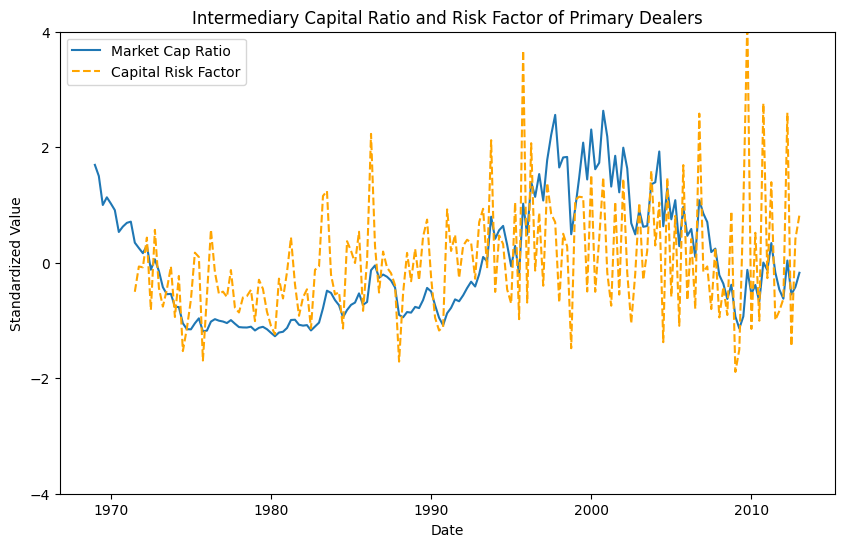

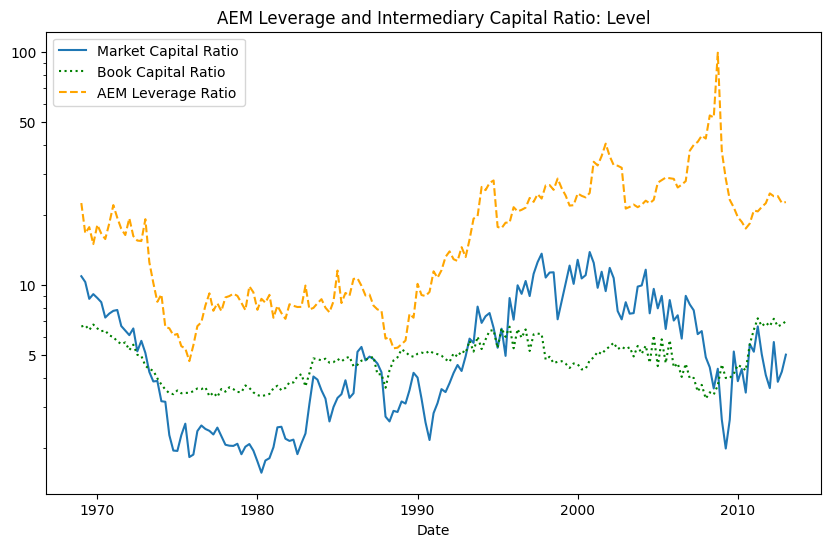

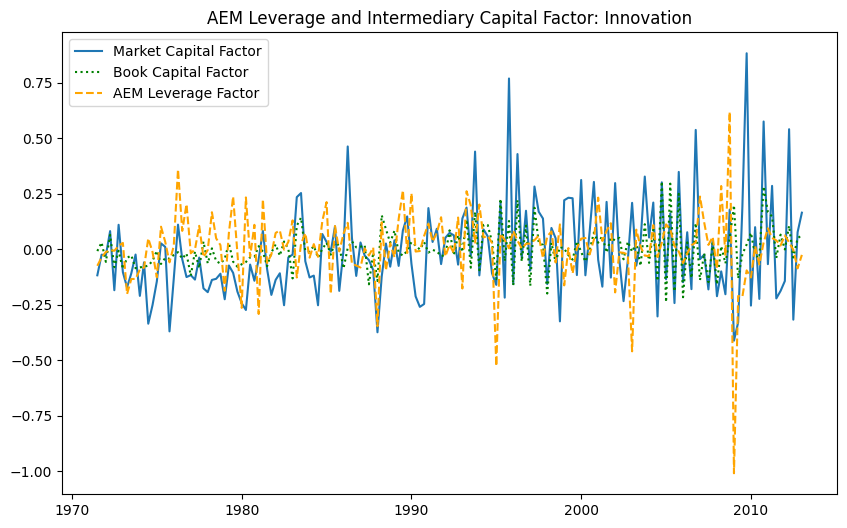

In [27]:
Table03Analysis.plot_figure01(ratio_dataset, factors_dataset)
Table03Analysis.plot_figure02(ratio_dataset)
Table03Analysis.plot_figure03(factors_dataset)

### Finally, we repeat the identical procedures above but this time we use UPDATED=True to get all lastest information after 2010 until today, and generate all corresponding tables and plots

Loading library list...
Done
Extracted ltab127d.prn to data\pulled\ltab127d.prn
Cache not found, pulling data...
Data pulled and saved to data\pulled\fred_bd.parquet
Loaded data from cache.
Loading data from cache.


,Market capital,Book capital,AEM leverage
Panel A: Correlations of levels,NaN,NaN,NaN
Market capital,1.0,0.481996,0.48486
Book capital,NaN,1.0,0.080056
AEM leverage,NaN,NaN,1.0
E/P,-0.782538,-0.599998,-0.552572
Unemployment,-0.548038,-0.29428,-0.256545
GDP,0.489296,0.710045,0.438687
Financial conditions,-0.528055,-0.469181,-0.245058
Market volatility,-0.034638,-0.08021,0.27672
Panel B: Correlations of factors,NaN,NaN,NaN


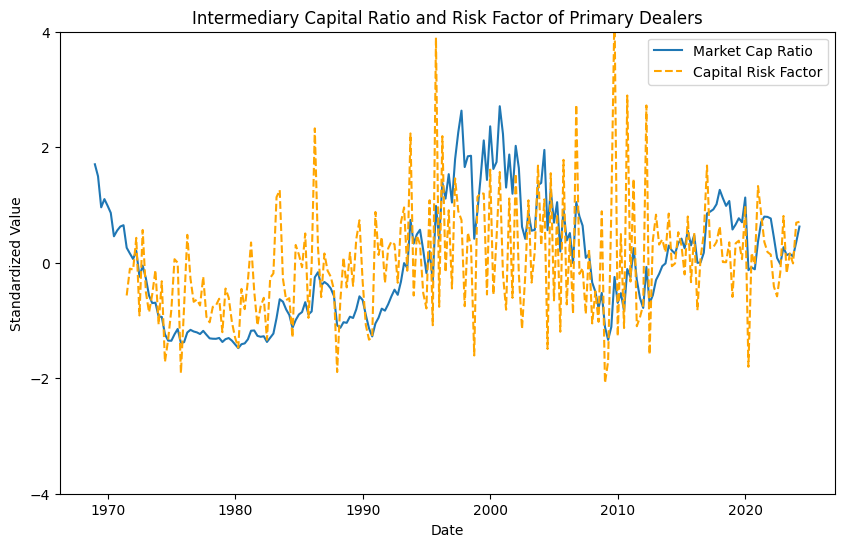

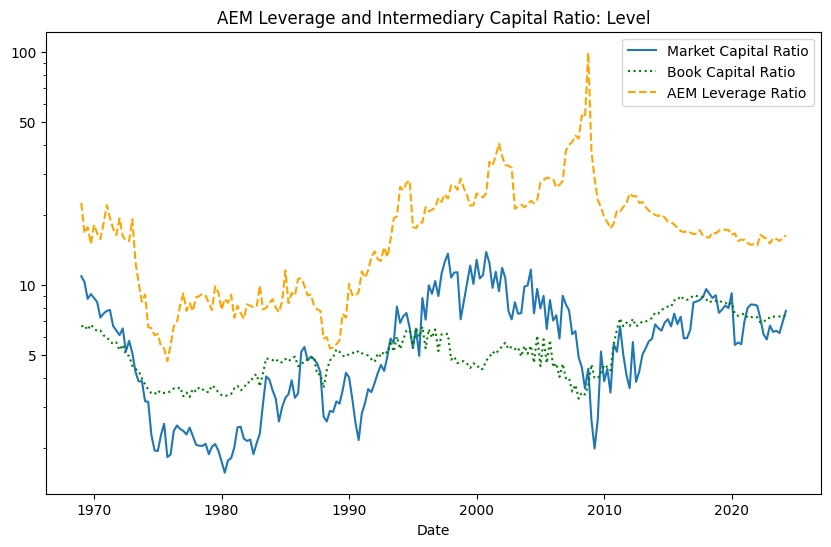

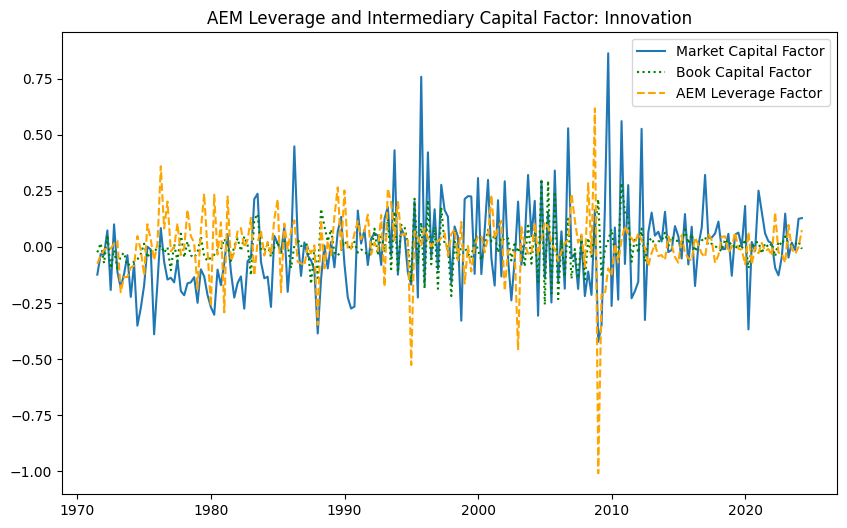

In [28]:
db = wrds.Connection(wrds_username=config.WRDS_USERNAME)
UPDATED = True

prim_dealers = Table03.get_gvkey()
dataset, _ = Table03Load.fetch_data_for_tickers(prim_dealers, db)
prep_datast = Table03.prep_dataset(dataset, UPDATED=UPDATED)
ratio_dataset = Table03.aggregate_ratios(prep_datast)
factors_dataset = Table03.convert_ratios_to_factors(ratio_dataset)
macro_dataset = Table03.macro_variables(db)
panelA = Table03.create_panelA(ratio_dataset, macro_dataset)
panelB = Table03.create_panelB(factors_dataset, macro_dataset)

Table03Analysis.create_summary_stat_table_for_panelA(panelA, UPDATED=UPDATED)
Table03Analysis.create_summary_stat_table_for_panelB(panelB, UPDATED=UPDATED)
Table03Analysis.plot_figure01(ratio_dataset, factors_dataset, UPDATED=UPDATED)
Table03Analysis.plot_figure02(ratio_dataset, UPDATED=UPDATED)
Table03Analysis.plot_figure03(factors_dataset, UPDATED=UPDATED)

correlation_panelA = Table03.calculate_correlation_panelA(panelA)
correlation_panelB = Table03.calculate_correlation_panelB(panelB)
formatted_table = Table03.format_final_table(correlation_panelA, correlation_panelB)
formatted_table